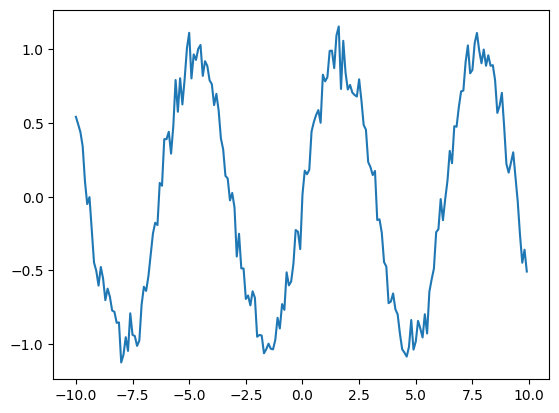

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.1)
x = x.reshape(len(x),1)
y = np.sin(x)+0.1*np.random.randn(len(x),1)

plt.plot(x,y)
plt.show()


In [2]:
class RNN:
    def __init__(self,x,n_neurons):
        self.n_neurons = n_neurons
        self.x_t = x
        self.t = max(x.shape)
        self.y_hat = np.zeros((self.t,1))
        
        self.H = [np.zeros((self.n_neurons,1)) for _ in range(self.t+1)]

        self.Wx = 0.1*np.random.randn(self.n_neurons,1)
        self.Wh = 0.1*np.random.randn(self.n_neurons,self.n_neurons)
        self.Wy = 0.1*np.random.randn(1,self.n_neurons)
        self.bias = 0.1*np.random.randn(self.n_neurons,1)

    def forward(self,xt,ht_1):
        out = np.dot(self.Wx,xt)+np.dot(self.Wh,ht_1)+self.bias
        ht = np.tanh(out)
        y_hat_t = np.dot(self.Wy,ht)

        return ht , y_hat_t,out 

In [3]:
r=RNN(x,500)
ht=r.H[0]
# r.y_hat.shape
for t,xt in enumerate(x):
    xt = xt.reshape(1,1)
    ht,y_hat_t,out=r.forward(xt,ht)
    r.H[t+1]=ht
    r.y_hat[t]=y_hat_t


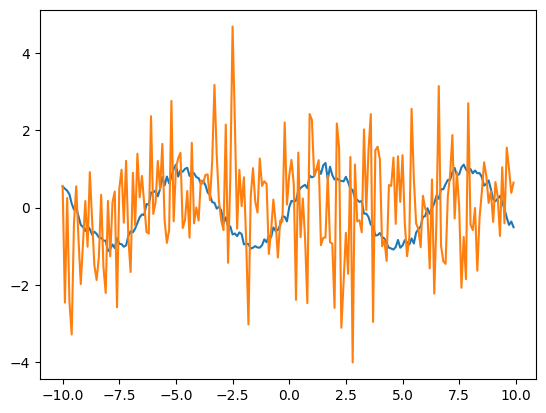

In [7]:
plt.plot(x,y)
plt.plot(x,r.y_hat)
plt.show()

In [ ]:
class Tanh:
    def forward(self,inputs):
        self.inputs = inputs
        self.outputs = np.tanh(self.inputs)

    def backward(self,dvalues):
        der = 1-self.outputs**2
        self.dinputs = np.multiply(der,dvalues) 

class RNN:
    def __init__(self,x,n_neurons,Activation):
        self.n_neurons = n_neurons
        self.x_t = x
        self.t = max(x.shape)
        self.y_hat = np.zeros((self.t,1))
        
        self.H = [np.zeros((self.n_neurons,1)) for _ in range(self.t+1)]

        self.Wx = 0.1*np.random.randn(self.n_neurons,1)
        self.Wh = 0.1*np.random.randn(self.n_neurons,self.n_neurons)
        self.Wy = 0.1*np.random.randn(1,self.n_neurons)
        self.bias = 0.1*np.random.randn(self.n_neurons,1)

        self.Activation = Activation

    
    def forward(self):
        self.dWx = np.zeros((self.n_neurons,1))
        self.dWh = np.zeros((self.n_neurons,self.n_neurons))
        self.dWy = np.zeros((1,self.n_neurons))
        self.dbias = np.zeros((self.n_neurons,1))

        x_t = self.x_t
        H=self.H
        y_hat =self.y_hat
        ht = H[0]

    def RNN_cell(self,xt,ht_1):
        out = np.dot(self.Wx,xt)+np.dot(self.Wh,ht_1)+self.bias
        ht = np.tanh(out)
        y_hat_t = np.dot(self.Wy,ht)

        return ht , y_hat_t,out 